In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [51]:
# Load the Excel file
file_path = '../data/diabetes_study_final_data.csv'
df = pd.read_csv(file_path, delimiter=',')

In [52]:



X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

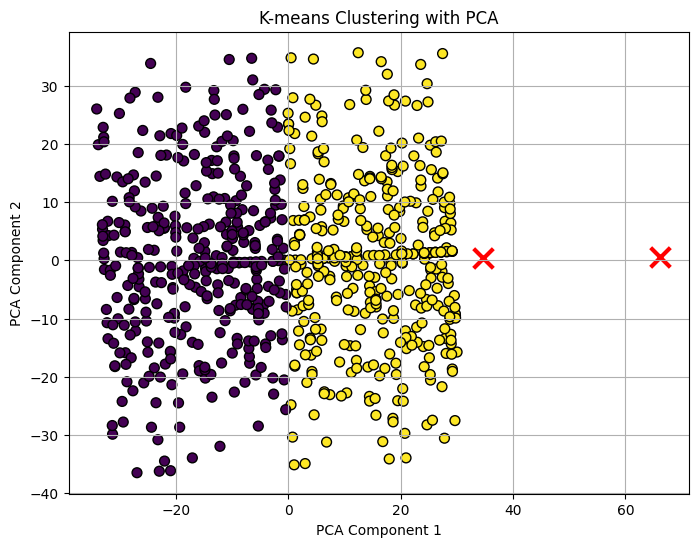

In [53]:
# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Scale the features using MaxAbsScaler
#scaler = MaxAbsScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(training_features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(training_features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [54]:
# Load the Excel file
file_path = '../data/patient_data.csv'
df = pd.read_csv(file_path, delimiter=';')

In [55]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df)

array([[-0.87447463, -0.69652603, -0.98019606, ..., -0.61845653,
        -0.05644281, -0.3575186 ],
       [-0.87447463, -0.69652603,  1.02020406, ..., -0.61845653,
        -0.43525286, -0.3575186 ],
       [ 1.14354375,  1.43569652,  1.02020406, ...,  1.61692852,
         0.57835285, -0.3575186 ],
       ...,
       [ 1.14354375,  1.43569652, -0.98019606, ..., -0.61845653,
         0.68227139, -0.3575186 ],
       [ 1.14354375,  1.43569652,  1.02020406, ..., -0.61845653,
         2.22394688,  2.79705728],
       [-0.87447463, -0.69652603,  1.02020406, ...,  1.61692852,
        -1.68893797, -0.3575186 ]])

In [56]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

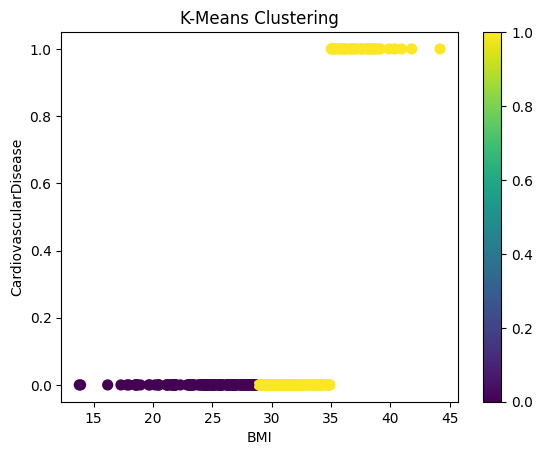

In [57]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['BMI'],df['CardiovascularDisease'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('BMI')
ax.set_ylabel('CardiovascularDisease')
plt.colorbar(scatter)